In [481]:
import sys
sys.executable

'/Users/soul/.ssh/oiad-3-2025/.venv/bin/python3.11'

In [482]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [483]:
data_path = "../datasets/teen_phone_addiction_dataset.csv"

In [484]:
dataFrame = pd.read_csv(data_path)
print(dataFrame.head())

   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0  ...       

In [485]:
N = 29
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Sleep_Hours'

In [486]:
my_col = 'Sleep_Hours'
data = dataFrame[my_col]

In [487]:
print(data.head())

0    6.1
1    6.5
2    5.5
3    3.9
4    6.7
Name: Sleep_Hours, dtype: float64


In [488]:
print(data.count())

3000


# **I**

In [489]:
# Calculations
mean = data.mean()
variance = data.var()
mode = data.mode()[0]  
median = data.median()

q1 = data.quantile(0.25)
q2 = data.quantile(0.5)  
q3 = data.quantile(0.75)

kurt_excess = data.kurtosis()
kurt_raw = kurt_excess + 3

#kurt_raw_2  = stats.kurtosis(data, fisher=False) 
#kurt_excess_2 = stats.kurtosis(data, fisher=True) 

skewness = data.skew()
iqr = q3 - q1

print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили уровня 0.25, 0.50, 0.75: Q1={q1}, Q2={q2}, Q3={q3}")
print(f"Обычный эксцесс: {kurt_raw}")
print(f"Избыточный эксцесс: {kurt_excess}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iqr}")

Среднее: 6.489766666666668
Дисперсия: 2.2222260208958544
Мода: 6.1
Медиана: 6.5
Квантили уровня 0.25, 0.50, 0.75: Q1=5.5, Q2=6.5, Q3=7.5
Обычный эксцесс: 2.7045585142051456
Избыточный эксцесс: -0.2954414857948544
Ассиметрия: 0.011854250604519175
Интерквартильный размах: 2.0


*Среднее и Медиана почти совпадают -> признак симметричного распределения.
Мода близка к среднему и медиане -> признак симметричного и унимодального*

In [490]:
k = 1 + int(np.log2(data.count())) # правило Стюрджеса
print(k)

12


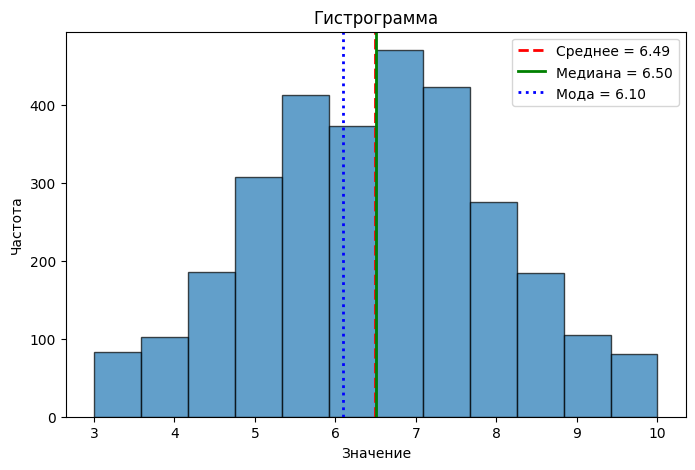

In [491]:
# Plots
plt.figure(figsize=(8, 5))
plt.hist(data, bins=k, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Среднее = {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Медиана = {median:.2f}')
plt.axvline(mode, color='blue', linestyle=':', linewidth=2, label=f'Мода = {mode:.2f}')
plt.title("Гистрограмма")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.legend()
plt.show()

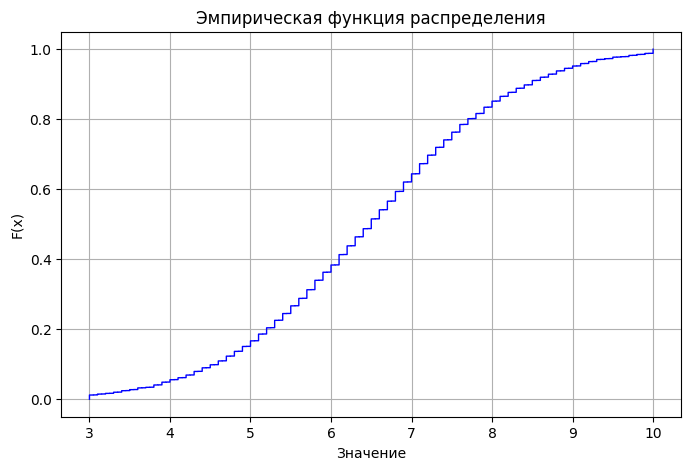

In [492]:
x = np.sort(data)
y = np.arange(1, len(x)+1) / len(x)  
plt.figure(figsize=(8, 5))
plt.step(x, y, where='mid', color='blue', linewidth=1)
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

**Вывод: Распределение унимодальное, стремится к нормальному, симметричное.**

# II

In [493]:
counts, bin_edges = np.histogram(data, bins=k)
expected = []

for i in range(len(bin_edges)-1):
    p_i = norm.cdf(bin_edges[i+1], loc=mean, scale=std) - norm.cdf(bin_edges[i], loc=mean, scale=std)
    expected.append(p_i * n)

expected = np.array(expected)

# Критерий χ²
chi2_stat = np.sum((counts - expected)**2 / expected)
df = k - 1 - 2  
p_value = 1 - stats.chi2.cdf(chi2_stat, df)  

print(f"p-value: {p_value}")

if p_value > 0.05:
    print("Данные нормально распределены (не отвергаем нулевую гипотезу).")
else:
    print("Данные не распределены нормально (отвергаем нулевую гипотезу).")

p-value: 6.008082920061497e-12
Данные не распределены нормально (отвергаем нулевую гипотезу).


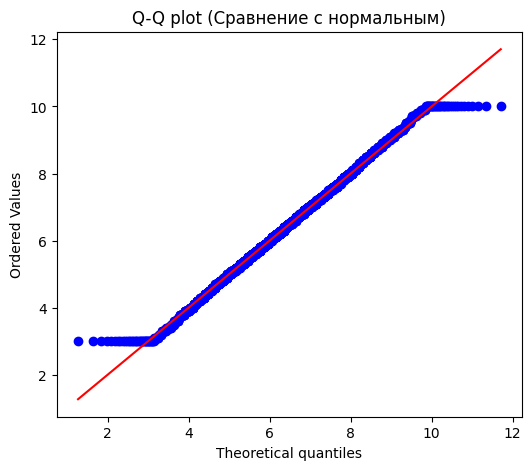

In [494]:
# Q-Q plot 
plt.figure(figsize=(6,5))
stats.probplot(data, dist="norm", sparams=(data.mean(), data.std(ddof=1)), plot=plt)
plt.title("Q-Q plot (Сравнение с нормальным)")
plt.show()

**Вывод: Оба теста отвергают нулевую гипотезу о том, что данные пришли из нормального распределения.**

# **III**

1. Проверим, есть ли выбросы.

In [495]:
sorted(data.unique())

[np.float64(3.0),
 np.float64(3.1),
 np.float64(3.2),
 np.float64(3.3),
 np.float64(3.4),
 np.float64(3.5),
 np.float64(3.6),
 np.float64(3.7),
 np.float64(3.8),
 np.float64(3.9),
 np.float64(4.0),
 np.float64(4.1),
 np.float64(4.2),
 np.float64(4.3),
 np.float64(4.4),
 np.float64(4.5),
 np.float64(4.6),
 np.float64(4.7),
 np.float64(4.8),
 np.float64(4.9),
 np.float64(5.0),
 np.float64(5.1),
 np.float64(5.2),
 np.float64(5.3),
 np.float64(5.4),
 np.float64(5.5),
 np.float64(5.6),
 np.float64(5.7),
 np.float64(5.8),
 np.float64(5.9),
 np.float64(6.0),
 np.float64(6.1),
 np.float64(6.2),
 np.float64(6.3),
 np.float64(6.4),
 np.float64(6.5),
 np.float64(6.6),
 np.float64(6.7),
 np.float64(6.8),
 np.float64(6.9),
 np.float64(7.0),
 np.float64(7.1),
 np.float64(7.2),
 np.float64(7.3),
 np.float64(7.4),
 np.float64(7.5),
 np.float64(7.6),
 np.float64(7.7),
 np.float64(7.8),
 np.float64(7.9),
 np.float64(8.0),
 np.float64(8.1),
 np.float64(8.2),
 np.float64(8.3),
 np.float64(8.4),
 np.float6

Вывод: выбросов нет. 

2. Так как все данные положительные и симметричные, не скошенные, то для приведения к нормальному распределению попробуем метод Box-Cox или  Yeo-Johnson.

In [496]:
boxcox_data, lambda_opt = stats.boxcox(data)

In [497]:
pt = PowerTransformer(method='yeo-johnson')
yeojohnson_data = pt.fit_transform(data.values.reshape(-1,1)).flatten()

Text(0.5, 1.0, 'Yeo-Johnson')

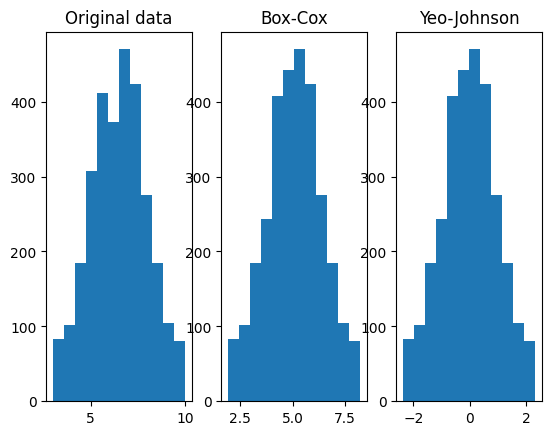

In [498]:
plt.subplot(1,3,1)
plt.hist(data, bins=k)
plt.title("Original data")

plt.subplot(1,3,2)
plt.hist(boxcox_data, bins=k)
plt.title("Box-Cox")

plt.subplot(1,3,3)
plt.hist(yeojohnson_data, bins=k)
plt.title("Yeo-Johnson")

Гистограммы обоих методов получились одинаковыми. Но по умолчанию при применении метода Yeo-Johnson данные дополнительно стандартизируются. Так что остановимся на этом методе.

In [499]:
tfd_data = pd.Series(yeojohnson_data)

In [500]:
# Calculations
mean = tfd_data.mean()
variance = tfd_data.var()
mode = tfd_data.mode()[0]  
median = tfd_data.median()

q1 = tfd_data.quantile(0.25)
q2 = tfd_data.quantile(0.5)  
q3 = tfd_data.quantile(0.75)

kurt_excess = tfd_data.kurtosis()
kurt_raw = kurt_excess + 3

#kurt_raw_2  = stats.kurtosis(data, fisher=False) 
#kurt_excess_2 = stats.kurtosis(data, fisher=True) 

skewness = tfd_data.skew()
iqr = q3 - q1

print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили уровня 0.25, 0.50, 0.75: Q1={q1}, Q2={q2}, Q3={q3}")
print(f"Обычный эксцесс: {kurt_raw}")
print(f"Избыточный эксцесс: {kurt_excess}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iqr}")

Среднее: -2.877698079828406e-16
Дисперсия: 1.0003334444814937
Мода: -0.255454990316795
Медиана: 0.013025134557306327
Квантили уровня 0.25, 0.50, 0.75: Q1=-0.6599226981566061, Q2=0.013025134557306327, Q3=0.6805190319108813
Обычный эксцесс: 2.7103696366762375
Избыточный эксцесс: -0.28963036332376246
Ассиметрия: -0.020140186203880472
Интерквартильный размах: 1.3404417300674873


In [501]:
k = 1 + int(np.log2(tfd_data.count())) # правило Стюрджеса
print(k)

12


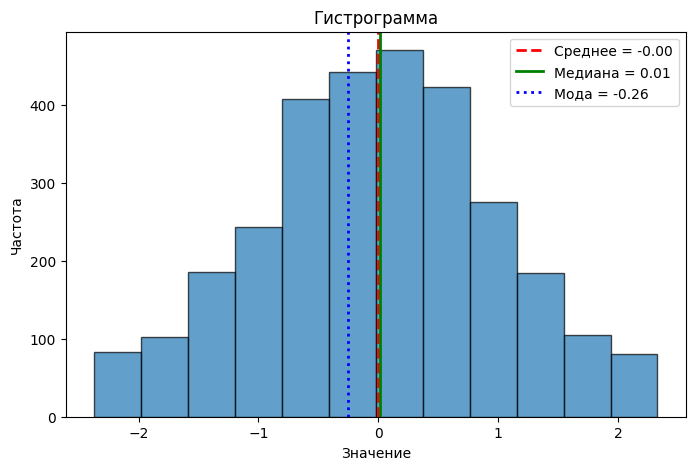

In [502]:
# Plots
plt.figure(figsize=(8, 5))
plt.hist(tfd_data, bins=k, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Среднее = {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Медиана = {median:.2f}')
plt.axvline(mode, color='blue', linestyle=':', linewidth=2, label=f'Мода = {mode:.2f}')
plt.title("Гистрограмма")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.legend()
plt.show()

Стало больше похоже на нормальное распределение.

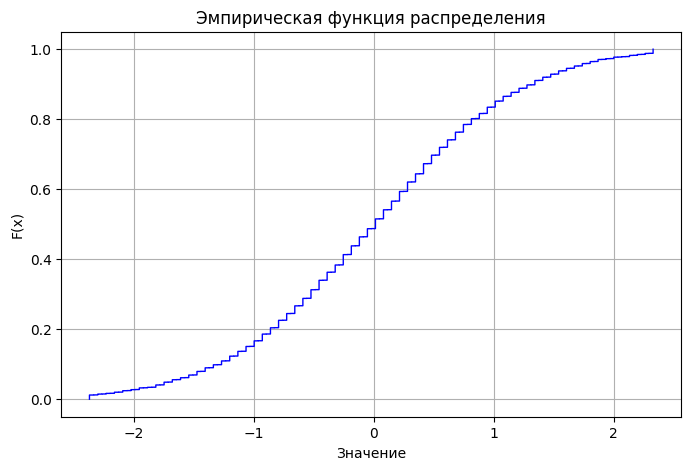

In [503]:
x = np.sort(tfd_data)
y = np.arange(1, len(x)+1) / len(x)  
plt.figure(figsize=(8, 5))
plt.step(x, y, where='mid', color='blue', linewidth=1)
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

In [504]:
counts, bin_edges = np.histogram(tfd_data, bins=k)
expected = []

for i in range(len(bin_edges)-1):
    p_i = norm.cdf(bin_edges[i+1], loc=mean, scale=std) - norm.cdf(bin_edges[i], loc=mean, scale=std)
    expected.append(p_i * n)

expected = np.array(expected)

# χ² статистика
chi2_stat = np.sum((counts - expected)**2 / expected)
df = k - 1 - 2  
p_value = 1 - stats.chi2.cdf(chi2_stat, df)  

print(f"p-value: {p_value}")

if p_value > 0.05:
    print("Данные нормально распределены (не отвергаем нулевую гипотезу).")
else:
    print("Данные не распределены нормально (отвергаем нулевую гипотезу).")

p-value: 0.0
Данные не распределены нормально (отвергаем нулевую гипотезу).


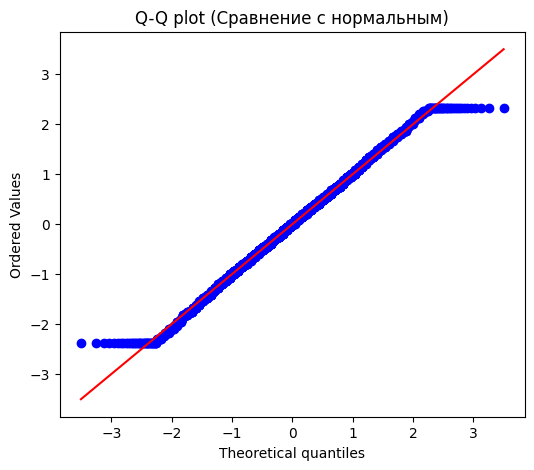

In [505]:
# Q-Q plot 
plt.figure(figsize=(6,5))
stats.probplot(data_trans, dist="norm", sparams=(data_trans.mean(), data_trans.std(ddof=1)), plot=plt)
plt.title("Q-Q plot (Сравнение с нормальным)")
plt.show()

**Вывод: Обработка данных не сильно помогла. Распределение стало больше похоже на нормальную по гистограмме. Но при проверке с использованием Хи-квадрата и Q-Q графика словно бы ничего и не поменялось.**

# **IV**

In [506]:
group_data = dataFrame.groupby('School_Grade')[my_col]

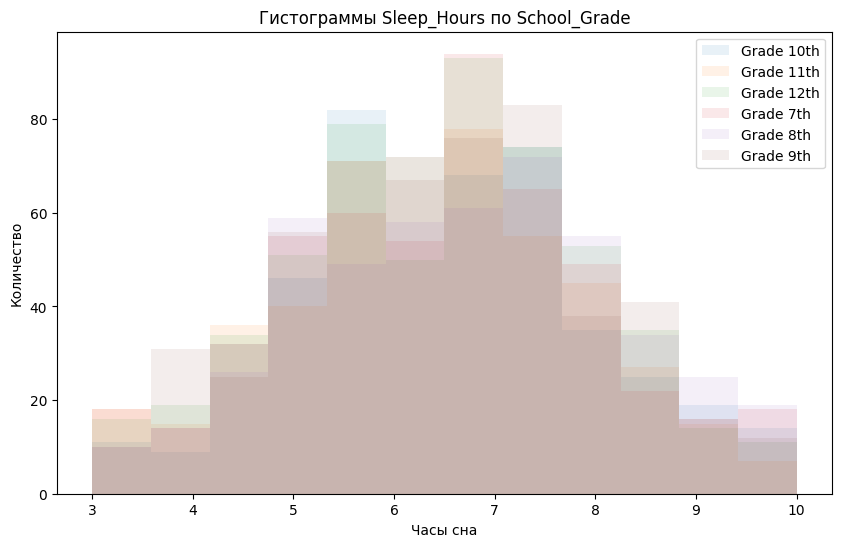

In [507]:
plt.figure(figsize=(10,6))

for name, group in group_data:
    plt.hist(group, bins=k, alpha=0.1, label=f'Grade {name}')

plt.title('Гистограммы Sleep_Hours по School_Grade')
plt.xlabel('Часы сна')
plt.ylabel('Количество')
plt.legend()
plt.show()

In [508]:
summary = group_data.agg(['mean', 'var'])
print(summary)

                  mean       var
School_Grade                    
10th          6.488296  2.102064
11th          6.367432  2.113079
12th          6.459735  2.201804
7th           6.483702  2.287617
8th           6.675311  2.406853
9th           6.468441  2.196945


**Вывод: У распределений минимум 4 моды. Также можно заметить, что дисперсия и среднее зависят от класса.**